In [2]:
%matplotlib inline

# STATIC SAX TUTORIAL ON SIMPLE DATA
In order to really get how SAX algorithm works, we popose were a detailed tutorial of how it works. In this section we will use really simple (and non realistic) data. The following example is leaning on __static_SAX__ file in __script__ folder of our repository. If you're already familiar with this algorithm and you are juste curious to see what happends on real noisy data, please go to the second section.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.stats import norm
sys.path.append("..")
from script.static_SAX import znormalization, paa_transform,paa_to_alphabet, sax_transform

In [3]:
data1 = np.asarray([2.02, 2.33, 2.99, 6.85, 9.20, 8.80, 7.50, 6.00, 5.85, 3.85, 4.85, 3.85, 2.22, 1.45, 1.34, 1.42, 3.68, 5.65, 4.23, 6.81])
data2 = np.asarray([0.50, 1.29, 2.58, 3.83, 3.25, 4.25, 3.83, 5.63, 6.44, 6.25, 8.75, 8.83, 3.25, 0.75, 0.72, 1.02, 4.56, 3.21, 5.51, 4.95])
time_series = np.asarray([data1,data2])

So we have here a numpy array of two (very simple) time series. What about plotting our data just to see what it's look like ?

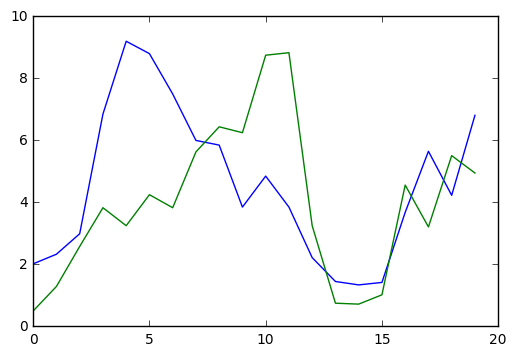

In [4]:
plt.plot(range(time_series.shape[1]),time_series[0,:])
plt.plot(range(time_series.shape[1]),time_series[1,:])

Here we have two signals with more or less the same amplitude. But in general, we prefer normalize these data.

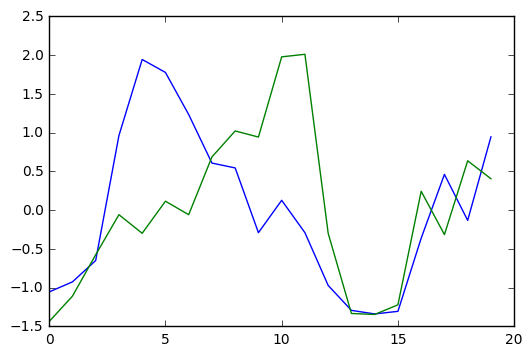

In [5]:
ztime_serie = znormalization(time_series)
plt.plot(range(ztime_serie.shape[1]),ztime_serie[0,:])
plt.plot(range(ztime_serie.shape[1]),ztime_serie[1,:])

Nothing surprising so far, the global trend has not changed because we just centered and reduced data. We will now perform PAA transformation using 4 intervals and plot the result on top of the real curve.

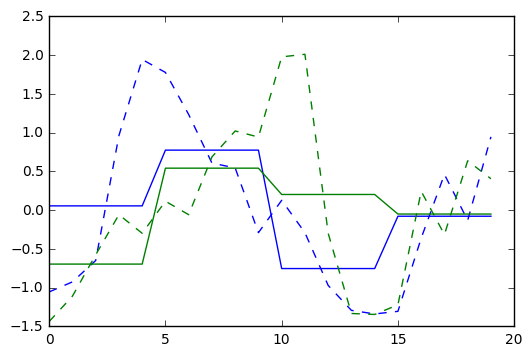

In [6]:
transform1 = paa_transform(ztime_serie, 4)
plt.plot(range(ztime_serie.shape[1]), ztime_serie[0,:], 'b--')
plt.plot(range(ztime_serie.shape[1]), np.repeat(transform1, ztime_serie.shape[1]/4, axis = 1)[0,:], 'b')
plt.plot(range(ztime_serie.shape[1]), ztime_serie[1,:], 'g--')
plt.plot(range(ztime_serie.shape[1]), np.repeat(transform1, ztime_serie.shape[1]/4, axis = 1)[1,:], 'g')

The truth is that having this kind of discretization is disappointing since we loose a lot of information... But to really get the importance of the __discretization parameter__ we will try again with something like 10 intervals ! 

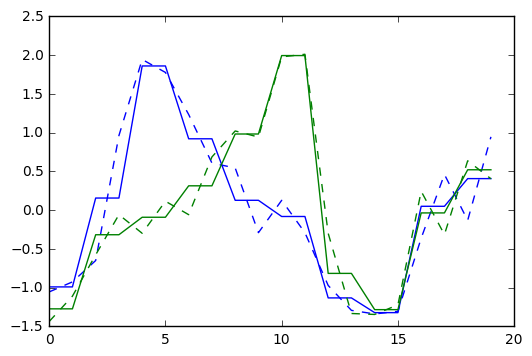

In [7]:
transform2 = paa_transform(ztime_serie, 10)
plt.plot(range(ztime_serie.shape[1]), ztime_serie[0,:], 'b--')
plt.plot(range(ztime_serie.shape[1]), np.repeat(transform2, ztime_serie.shape[1]/10, axis = 1)[0,:], 'b')
plt.plot(range(ztime_serie.shape[1]), ztime_serie[1,:], 'g--')
plt.plot(range(ztime_serie.shape[1]), np.repeat(transform2, ztime_serie.shape[1]/10, axis = 1)[1,:], 'g')

Now the discretization fits much more better our curves. So our discretization will contains the nearly the same information than original data. Note that in our first exemple we had only 4 *points* and that now we have 10 _points_ so 2 times less than in the original data.
Now we have a discretization containing a good proportion of the original signal, we will transform it into an alphabet. 
To begin with, we will take an numeric alphabet of size 10, and we will use gaussain assumption of the normalized data.

In [16]:
alphabet = range(10)
quantils = np.linspace(1./10, 1-1./10, 10-1)
gaus_percentils0 = np.percentile(ztime_serie[0,:],quantils*100)
result0 = paa_to_alphabet(transform2[0,:], alphabet, gaus_percentils0)
gaus_percentils1 = np.percentile(ztime_serie[1,:],quantils*100)
result1 = paa_to_alphabet(transform2[1,:], alphabet, gaus_percentils1)
print "Sax transformation for the first signal : ", result0
print "Sax transformation for the second signal : ", result1

Sax transformation for the first signal :  [1 5 9 7 5 5 1 0 5 6]
Sax transformation for the second signal :  [1 3 4 6 8 9 2 1 5 7]


So everything is good so far, but I'm sure you're telling yourself that we did here a strong assumption. And that's true, we assumed that our normalized data follows a gaussian distrbution. So we will compare with the real distribution percentiles.

In [ ]:
real_percentils0 = 

In [92]:
np.percentile(zts.flatten(),range(0,100,10))

array([-1.33469017, -1.24076753, -1.01811078, -0.71141436, -0.29664045,
       -0.1787192 ,  0.09291467,  0.56716887,  0.88837689,  1.65961836])